In [5]:
import pandas as pd
import numpy as np

from scipy import fftpack
from pathlib import Path

groundTruthPath = Path('feed_Data_Mining_Assignment1-Data\Data_Mining_Assign1Data\groundTruth')
myODataPath = Path('feed_Data_Mining_Assignment1-Data\Data_Mining_Assign1Data\MyoData')

gtDataPath= groundTruthPath / 'user10' / 'fork'
dataPath = myODataPath / 'user10'/ 'fork'

gtFiles = list(gtDataPath.glob("*.txt"))
dataFiles = list(dataPath.glob("*EMG.txt"))

gtData = np.genfromtxt(gtFiles[0], dtype=None, delimiter=',', usecols=(0,1))
myOData = np.genfromtxt(dataFiles[0], dtype=None, delimiter=',')


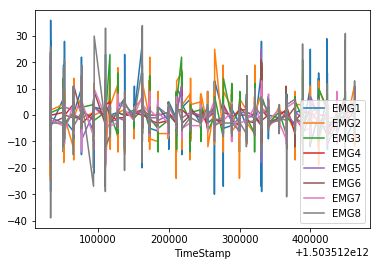

In [6]:
myODataEatingIntervals = []
eatingDfs = []

for gTruth in gtData:
    #sampleRate conversion for EMG data
    startIndex = int(gTruth[0] * 100 / 30)
    endIndex = int(gTruth[1] * 100 / 30)
    
    #print("GroundTruth=" + str(gTruth[0]) + ":" + str(gTruth[1]) + " Start/End Index=" + str(startIndex) + ": " +str(endIndex))
    #save in list, start and end indices
    myODataEatingIntervals.append([startIndex, endIndex])
    
    #save eating data intervals
    eatingDfs.append(pd.DataFrame(myOData[startIndex:endIndex]))

#make pretty and plot in respect to TimeStamp
eatingDF = pd.concat(eatingDfs).sample(n=600)

eatingDF.columns=['TimeStamp','EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']

eatingDF.sort_values('TimeStamp').plot(x='TimeStamp')

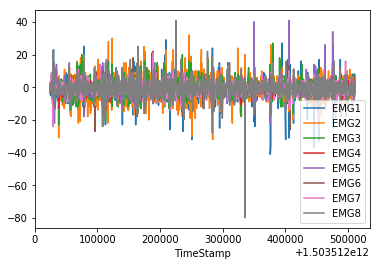

In [7]:
notEatingStart = 0
notEatingDfs = []

for interval in myODataEatingIntervals:
    notEatingEnd = interval[0]-1
    
    #print(str(notEatingStart) + " : " + str(notEatingEnd))
    
    notEatingDfs.append(pd.DataFrame(myOData[notEatingStart:notEatingEnd]))
    
    notEatingStart = interval[1]+1
    
## last interval, to end of myOData
notEatingDfs.append(pd.DataFrame(myOData[notEatingStart:]))    

#make pretty and plot in respect to TimeStamp
notEatingDF = pd.concat(notEatingDfs).sample(n=1800)
notEatingDF.columns=['TimeStamp','EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
notEatingDF.sort_values('TimeStamp').plot(x='TimeStamp')

(8, 2)
2


LinAlgError: Last 2 dimensions of the array must be square

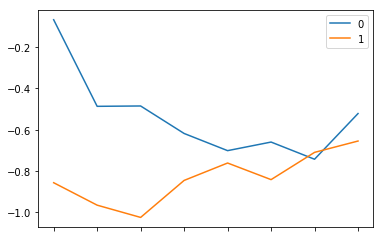

In [68]:
#AVERAGE


meanList = [eatingDF.mean()]
meanList.append(notEatingDF.mean())

meanCombined = pd.concat(meanList, axis=1)[1:]

#print(type(meanCombined))
meanCombined.plot()
print(meanCombined.shape[-2:])
print(min(meanCombined.shape[-2:]))
eigenvalues = np.linalg.eigvals(meanCombined.values)

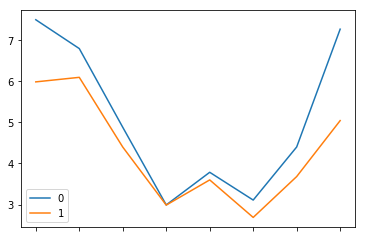

In [64]:
#STANDARD DEVIATION


stdDeviations = [eatingDF.std()]
stdDeviations.append(notEatingDF.std())

#print(type(stdDeviations[0][1:]))
#print(stdDeviations[0])
#print(stdDeviations[1])

pd.concat(stdDeviations, axis=1)[1:].plot()#(kind='bar')

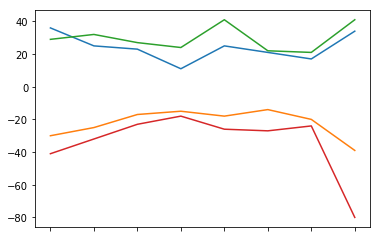

In [65]:
#EATING
#MAX
eatMaxDF = eatingDF.iloc[:,1:].max()
#print(eatMaxDF)

#MIN
eatMinDF = eatingDF.iloc[:,1:].min()
#print(eatMaxDF)

#NOT EATING
#MAX
notEatMaxDF = notEatingDF.iloc[:,1:].max()
#print(notEatMaxDF)

#MIN
notEatMinDF = notEatingDF.iloc[:,1:].min()
#print(notEatMinDF)

eatMaxDF.plot()
eatMinDF.plot()
notEatMaxDF.plot()
notEatMinDF.plot()

<class 'numpy.ndarray'>


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


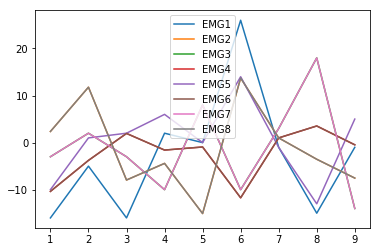

In [61]:
#FFT

fft = fftpack.fft(eatingDF.iloc[:10,1:])
print(type(fft))
#print(fft)

results = pd.DataFrame(fft).iloc[1:,:]
results.columns=['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']

results.plot()#.sample(n=25)
